In [1]:
#Library
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read file
df = pd.read_csv(r"C:\Users\Redr8\OneDrive\Área de Trabalho\Csv\olist_customers_dataset.csv")

In [3]:
#Info
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


(99441, 5)

In [4]:
#MyConnection
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=DESKTOP-ADU8TNS;DATABASE=Csv;UID=123;PWD=123')

cursor = conn.cursor()

In [5]:
#Look Sql to find table
try:
    result = pd.read_sql("SELECT * FROM Csv_New", conn) 
    result.head()
    print("Table exists!")
except:
    cursor.execute("CREATE TABLE Csv_New (customer_id varchar(255), customer_unique_id varchar(255) ,customer_zip_code_prefix int,customer_city varchar(255),customer_state varchar(255))")
    conn.commit()
    conn.close()
    print("Table created!")


Table created!


In [6]:
#Reconnect
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=DESKTOP-ADU8TNS;DATABASE=Csv;UID=123;PWD=123')
cursor = conn.cursor()
#Insert into sql
for row in df.itertuples():
    cursor.execute("""INSERT INTO Csv_New(customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state) VALUES (?,?,?,?,?)""", row.customer_id,row.customer_unique_id,row.customer_zip_code_prefix,row.customer_city,row.customer_state)
#Reconnect
    conn.commit()
conn.close()

In [7]:
#Reconnect
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=DESKTOP-ADU8TNS;DATABASE=Csv;UID=123;PWD=123')
cursor = conn.cursor()
#Drop Duplicate Rows
#Create a temporary table to found duplicates data
cursor.execute("""WITH CTE AS(
   SELECT customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,
       RN = ROW_NUMBER()OVER(PARTITION BY customer_id ORDER BY customer_id)
   FROM Csv_New
)
DELETE FROM CTE WHERE RN > 1""")

#Close connection
conn.commit()
conn.close()

In [8]:
#Reconnect
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=DESKTOP-ADU8TNS;DATABASE=Csv;UID=123;PWD=123')
cursor = conn.cursor()

#New query
result = pd.read_sql("SELECT * FROM Csv_View", conn)
conn.commit()
conn.close()


In [12]:
#View new table
result = result.sort_values(by='customer_city_qtd', ascending=False)
print(result.head(20))

              customer_city customer_state  customer_city_qtd
4270              sao paulo             SP              15540
2650         rio de janeiro             RJ               6882
1661         belo horizonte             MG               2773
335                brasilia             DF               2131
1578               curitiba             PR               1521
3594               campinas             SP               1444
3779           porto alegre             RS               1379
697                salvador             BA               1245
3616              guarulhos             SP               1189
4208  sao bernardo do campo             SP                938
2300                niteroi             RJ                849
3436            santo andre             SP                796
4170                 osasco             SP                746
3709                 santos             SP                713
600                 goiania             GO                692
3441    

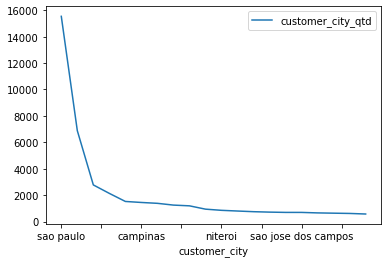

In [13]:
#Plot
result.head(20).plot(x = 'customer_city')
plt.show()

In [19]:
#Download to excel
result.to_excel("Csv_View.xlsx", sheet_name='City',index=False)